In [1]:
# Step 1 : import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
# Step 2 : import data
df = pd.read_csv('M6_T2_V1_Diamonds.csv')

In [3]:
# Step 3 : define target (y) and features (X)
print(df)

       carat        cut color clarity  price     x     y     z
0       0.23      Ideal     E     SI2    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1    326  3.89  3.84  2.31
2       0.23       Good     E     VS1    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2    334  4.20  4.23  2.63
4       0.31       Good     J     SI2    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   2757  5.83  5.87  3.64

[53940 rows x 8 columns]


<Axes: xlabel='price', ylabel='Density'>

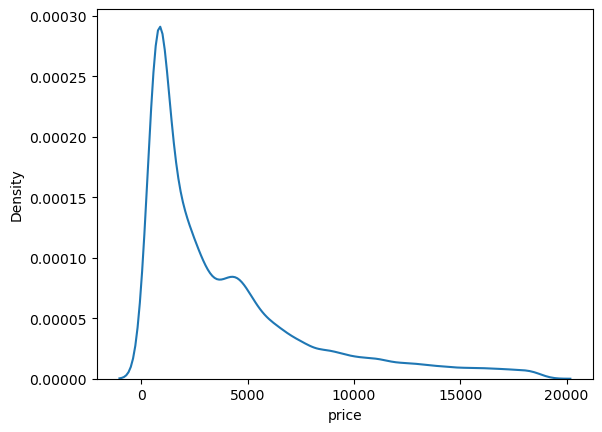

In [4]:
sns.kdeplot(df.price)

<Axes: xlabel='carat', ylabel='Density'>

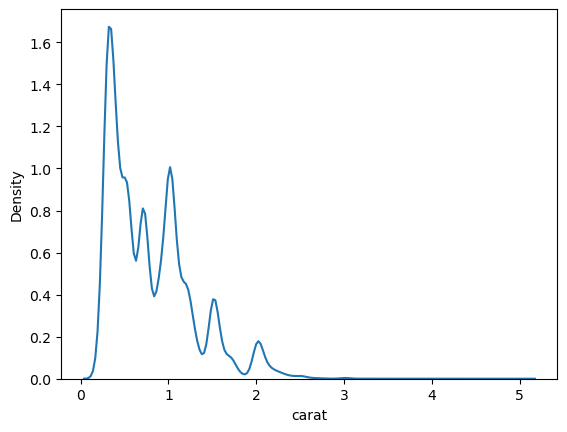

In [5]:
sns.kdeplot(df.carat)

In [6]:
#Taking logarithmic price instead
df['logprice'] = np.log(df.price)
df.carat = np.log(df.carat)

<Axes: xlabel='logprice', ylabel='Density'>

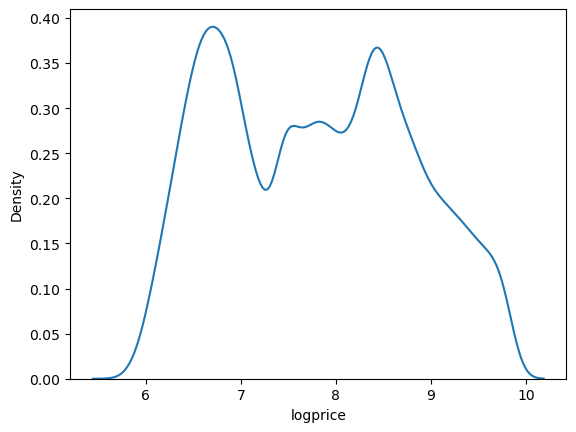

In [7]:
sns.kdeplot(df.logprice)

<Axes: xlabel='carat', ylabel='Density'>

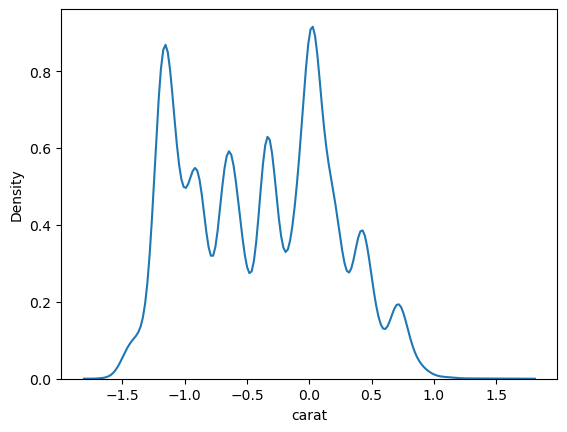

In [8]:
sns.kdeplot(df.carat)

In [9]:
#correlation with log price
y=df.drop(columns=['cut','color', 'clarity'])
y.corr()

,carat,price,x,y,z,logprice
carat,1.000000,0.855526,0.990166,0.966495,0.969060,0.965914
price,0.855526,1.000000,0.884435,0.865421,0.861249,0.895771
x,0.990166,0.884435,1.000000,0.974701,0.970772,0.958010
y,0.966495,0.865421,0.974701,1.000000,0.952006,0.936173
z,0.969060,0.861249,0.970772,0.952006,1.000000,0.935218
logprice,0.965914,0.895771,0.958010,0.936173,0.935218,1.000000


<Axes: xlabel='carat', ylabel='logprice'>

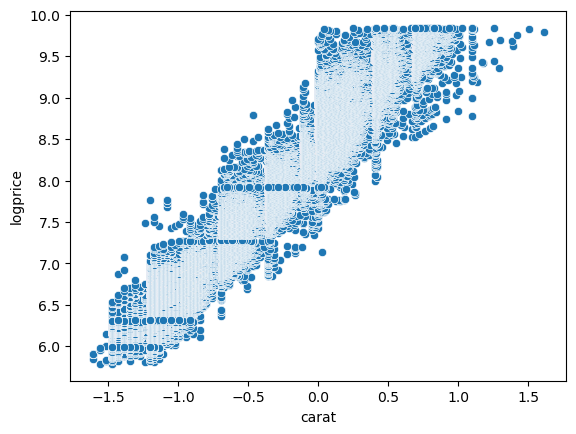

In [10]:
sns.scatterplot(x =df.carat, y=df.logprice, data=df)

In [11]:
formula = 'logprice ~ carat + cut + clarity + color + x + y + z'

In [12]:
lm = smf.ols(formula = formula, data = df).fit()

In [13]:
#Use the same modelling as before but with log price instead
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Tue, 02 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:39:09   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4967      0.026  

In [14]:
pred = lm.predict(df)

<Axes: xlabel='logprice'>

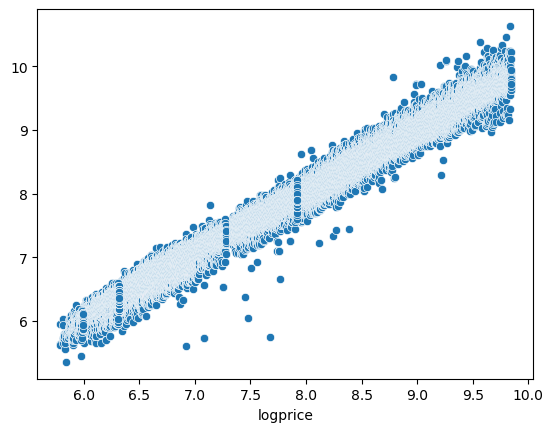

In [15]:
#relation between predicted price and log price
sns.scatterplot(x=df.logprice, y=pred, data=df)

In [16]:
#Finding Residual(Difference between Predicted Price and Log-Price)
resid = pred - df.logprice

<Axes: xlabel='logprice'>

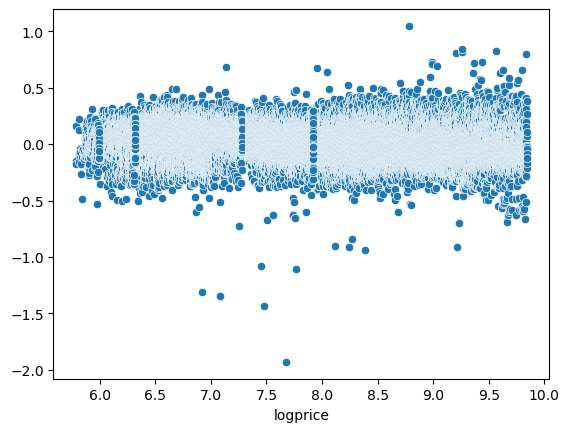

In [17]:
#plotting residual with log price
sns.scatterplot(x=df.logprice, y=resid, data=df)

<Axes: ylabel='Density'>

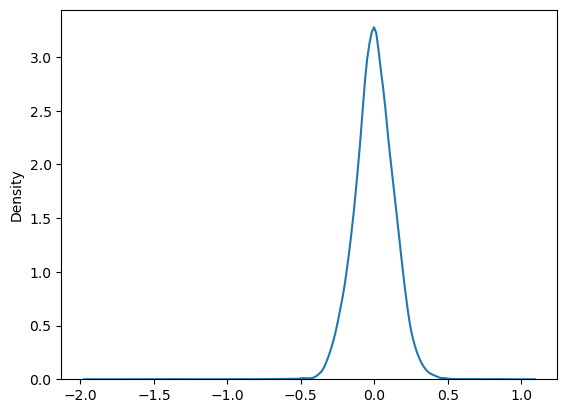

In [18]:
sns.kdeplot(resid)

In [19]:
#Calculating exponential of Predicted Price
np.exp(pred)

0         280.647327
1         274.385712
2         382.933084
3         417.744262
4         285.099003
            ...     
53935    2942.134316
53936    2716.710405
53937    2671.815551
53938    2651.669895
53939    2692.910409
Length: 53940, dtype: float64

<Axes: xlabel='price'>

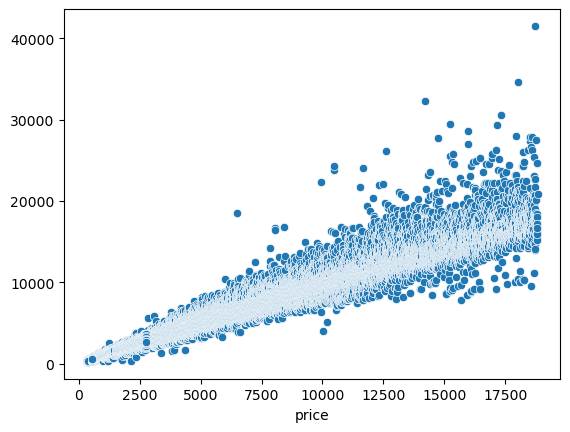

In [20]:
#relation between exponential predicted value with log price
sns.scatterplot(x=df.price, y=np.exp(pred),data=df)

In [21]:
df.tail()

,carat,cut,color,clarity,price,x,y,z,logprice
53935,-0.328504,Ideal,D,SI1,2757,5.75,5.76,3.50,7.921898
53936,-0.328504,Good,D,SI1,2757,5.69,5.75,3.61,7.921898
53937,-0.356675,Very Good,D,SI1,2757,5.66,5.68,3.56,7.921898
53938,-0.150823,Premium,H,SI2,2757,6.15,6.12,3.74,7.921898
53939,-0.287682,Ideal,D,SI2,2757,5.83,5.87,3.64,7.921898


In [22]:
pred2 = lm.predict(df.tail(1))

print('''PREDICATED PRICE of Index Row 53939''')
print(np.exp(pred2))

print('''
ACTUAL PRICE of Index Row 53939''')
print(df['price'].tail(1))

PREDICATED PRICE of Index Row 53939
53939    2692.910409
dtype: float64

ACTUAL PRICE of Index Row 53939
53939    2757
Name: price, dtype: int64
